In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as f
import torchvision
import torchvision.transforms as T
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
# load model, load parameters, set it to eval mode
model = torchvision.models.resnet152(pretrained = True)
model.fc = nn.Sequential(
                        nn.Linear(model.fc.in_features, 256),
                        nn.ReLU(),
                        nn.Linear(256, 70),                   
                        nn.LogSoftmax(dim=1)) 

model.load_state_dict(torch.load('model_weights_resnet18.pth'))

# transforms
transforms = T.Compose([
        T.Resize(256),
        T.CenterCrop(224),   
        T.ToTensor(),      
        T.RandomHorizontalFlip()
])

# dataset
testset = torchvision.datasets.ImageFolder("../datasets/DogBreeds/test", transform = transforms)
testloader = DataLoader(testset, batch_size= 10, shuffle=True) # 一个batch为10张图片

In [3]:
images, labels = iter(testloader).next()
print(labels)
print(testset.classes)

tensor([30, 29,  3, 63, 18, 37, 25, 66, 61, 56])
['Afghan', 'African Wild Dog', 'Airedale', 'American Hairless', 'American Spaniel', 'Basenji', 'Basset', 'Beagle', 'Bearded Collie', 'Bermaise', 'Bichon Frise', 'Blenheim', 'Bloodhound', 'Bluetick', 'Border Collie', 'Borzoi', 'Boston Terrier', 'Boxer', 'Bull Mastiff', 'Bull Terrier', 'Bulldog', 'Cairn', 'Chihuahua', 'Chinese Crested', 'Chow', 'Clumber', 'Cockapoo', 'Cocker', 'Collie', 'Corgi', 'Coyote', 'Dalmation', 'Dhole', 'Dingo', 'Doberman', 'Elk Hound', 'French Bulldog', 'German Sheperd', 'Golden Retriever', 'Great Dane', 'Great Perenees', 'Greyhound', 'Groenendael', 'Irish Spaniel', 'Irish Wolfhound', 'Japanese Spaniel', 'Komondor', 'Labradoodle', 'Labrador', 'Lhasa', 'Malinois', 'Maltese', 'Mex Hairless', 'Newfoundland', 'Pekinese', 'Pit Bull', 'Pomeranian', 'Poodle', 'Pug', 'Rhodesian', 'Rottweiler', 'Saint Bernard', 'Schnauzer', 'Scotch Terrier', 'Shar_Pei', 'Shiba Inu', 'Shih-Tzu', 'Siberian Husky', 'Vizsla', 'Yorkie']


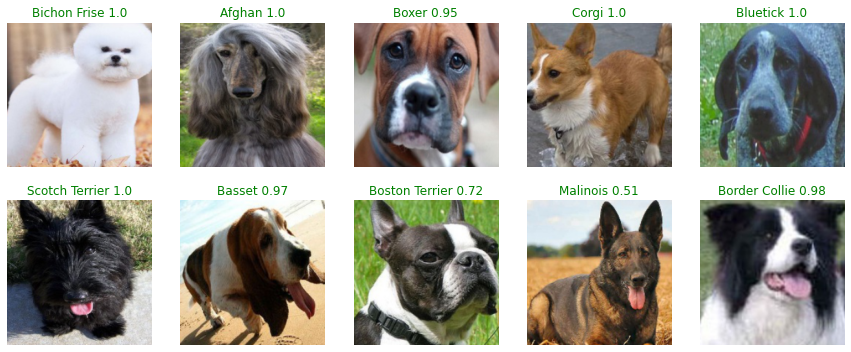

The correct answer is:
Bichon Frise, Afghan, Boxer, Corgi, Bluetick, Scotch Terrier, Basset, Boston Terrier, Malinois, Border Collie


In [4]:
images, labels = iter(testloader).next()

with torch.no_grad():
  model.eval()
  out = model(images)
  probs = f.softmax(out, dim=1).sort(descending = True)   # [10, 70]
  preds = torch.argmax(out, dim=1) # [10, 1]

images = images.numpy() # 从 tensor 转换为 numpy, 从而可以使用 pyplot 绘制

figure = plt.figure(figsize=(15 , 6))
for i in range(10):
    figure.add_subplot(2, 5, i + 1)
    plt.title(testset.classes[preds[i]] + " " + str(round(probs.values[i][0].item(), 2)), color=("green" if preds[i]==labels[i] else "red"))
    plt.axis("off")
    plt.imshow(np.transpose(images[i], (1,2,0))) # (3, 224, 224) -> (224, 224, 3)
plt.show()

print('The correct answer is:')
print(', '.join(f'{testset.classes[labels[i]]}' for i in range(10)))